In [1]:
# Imported necessary libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

print('succesfully imported libaries....')

succesfully imported libaries....


## Data Preparation

In [2]:
# Loading the dataset
df = pd.read_csv('zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [3]:
# A function to to analyze the shape, number of columns, and information of the dataset
def analyze_dataset(df):
    """
    This function  outputs information about the shape,
    columns, and information of the dataset using the Pandas library.
    """
    # Output the shape of the dataset
    print("Shape of dataset:", df.shape)
    print('\n-----------------------------------------------------------')

    # Output the column names of the dataset
    print("Column names:", list(df.columns))
    print('\n-----------------------------------------------------------')

    # Output information about the dataset
    print(df.info())
    print('\n-----------------------------------------------------------')

    # output descriptive statistics about the dataset
    print(df.describe())
    print('\n-----------------------------------------------------------')


In [4]:
# calling the function
analyze_dataset(df)

Shape of dataset: (14723, 272)

-----------------------------------------------------------
Column names: ['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '

- The dataset has 14723 rows and 272 columns,4 categorical and the rest are numerical

## Data Cleaning

In [5]:
# Checking for duplicates and missing data in the dataset
def cleaning(data):
    "This is a simple function to get missing and duplicated values"
    missing = data.isna().sum().sum()
    duplicated = data.duplicated().sum()
    return (f"There are '{missing}' missing values and '{duplicated}' duplicated values in the dataset")

In [6]:
# Calling the function
cleaning(df)

"There are '157934' missing values and '0' duplicated values in the dataset"

In [7]:
# creating a dataframe to display the column datatypes and unique values
desc = []
for i in df.columns:
    desc.append([
        i,
        df[i].dtypes,
        df[i].nunique(),
    ])

pd.DataFrame(data = desc, columns=['Feature','Dtypes','Sample_Unique'])

,Feature,Dtypes,Sample_Unique
0,RegionID,int64,14723
1,RegionName,int64,14723
2,City,object,7554
3,State,object,51
4,Metro,object,701
...,...,...,...
267,2017-12,int64,5248
268,2018-01,int64,5276
269,2018-02,int64,5303
270,2018-03,int64,5332


In [8]:
# Defined a function to  calculate the percentage of missing values in the dataset
def missing_values_percentage(df):
    # Calculating the total number of missing values in the Dataframe
    total_missing = df.isnull().sum().sum()

    # checking the total number of cells in the DataFrame
    total_cells = df.size

    # calculating the percentage of missing values
    percentage_missing = (total_missing / total_cells) * 100
    
    return percentage_missing

missing_values_percentage(df)

3.943759463983923

- Missing values are 3.94% of the entire dataset. Lets go ahead and preview the percentage of missing values per each individual column

In [9]:
# Calculating the percentage of missing values for each column in the DataFrame
missing_values = df.isnull().mean() * 100

# Print the list of columns in the DataFrame along with their missing percentages
for column in missing_values.index:
    # Print the column name followed by its corresponding missing percentage
    print(column, missing_values[column])


RegionID 0.0
RegionName 0.0
City 0.0
State 0.0
Metro 7.084154044691979
CountyName 0.0
SizeRank 0.0
1996-04 7.056985668681655
1996-05 7.056985668681655
1996-06 7.056985668681655
1996-07 7.056985668681655
1996-08 7.056985668681655
1996-09 7.056985668681655
1996-10 7.056985668681655
1996-11 7.056985668681655
1996-12 7.056985668681655
1997-01 7.056985668681655
1997-02 7.056985668681655
1997-03 7.056985668681655
1997-04 7.056985668681655
1997-05 7.056985668681655
1997-06 7.056985668681655
1997-07 7.050193574679074
1997-08 7.050193574679074
1997-09 7.050193574679074
1997-10 7.050193574679074
1997-11 7.050193574679074
1997-12 7.050193574679074
1998-01 7.036609386673912
1998-02 7.036609386673912
1998-03 7.036609386673912
1998-04 7.036609386673912
1998-05 7.036609386673912
1998-06 7.036609386673912
1998-07 7.036609386673912
1998-08 7.036609386673912
1998-09 7.036609386673912
1998-10 7.036609386673912
1998-11 7.036609386673912
1998-12 7.036609386673912
1999-01 7.036609386673912
1999-02 7.0366093

- The percentage of the missing values per column is still low, it is ranging from 1%-7% thus i chose to fill the missing values for the metro column with the string  missing then dropping the missing values in the date columns.

In [10]:
# Filling the 'Metro' column with the word 'missing'
df['Metro'].fillna('missing', inplace=True)

# Calculating the percentage of missing values for each column in the DataFrame
missing_values = df.isnull().mean() * 100

# Handling the date columns' missing values
df.dropna(inplace=True)

# Print the list of columns in the DataFrame along with their missing percentages
for column, percentage in missing_values.items():
    print(f"{column}: {percentage}%")


RegionID: 0.0%
RegionName: 0.0%
City: 0.0%
State: 0.0%
Metro: 0.0%
CountyName: 0.0%
SizeRank: 0.0%
1996-04: 7.056985668681655%
1996-05: 7.056985668681655%
1996-06: 7.056985668681655%
1996-07: 7.056985668681655%
1996-08: 7.056985668681655%
1996-09: 7.056985668681655%
1996-10: 7.056985668681655%
1996-11: 7.056985668681655%
1996-12: 7.056985668681655%
1997-01: 7.056985668681655%
1997-02: 7.056985668681655%
1997-03: 7.056985668681655%
1997-04: 7.056985668681655%
1997-05: 7.056985668681655%
1997-06: 7.056985668681655%
1997-07: 7.050193574679074%
1997-08: 7.050193574679074%
1997-09: 7.050193574679074%
1997-10: 7.050193574679074%
1997-11: 7.050193574679074%
1997-12: 7.050193574679074%
1998-01: 7.036609386673912%
1998-02: 7.036609386673912%
1998-03: 7.036609386673912%
1998-04: 7.036609386673912%
1998-05: 7.036609386673912%
1998-06: 7.036609386673912%
1998-07: 7.036609386673912%
1998-08: 7.036609386673912%
1998-09: 7.036609386673912%
1998-10: 7.036609386673912%
1998-11: 7.036609386673912%
1998-

- There are '0' missing values and '0' duplicated values in the dataset.The dataset doesn't have any missing values or any duplicates. Since region ID is the unique identifier, let's check if there is any duplicates in that column.

In [11]:
# Checking for duplicates in the region ID column only
df[df['RegionID'].duplicated(keep=False)]


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04


- The data does not have any duplicated ID in the region ID column values

In [12]:
# Defined a function to check and print the value counts for each column in a DataFrame
def check_value_counts(data):
    # Iterate through each column in the DataFrame
    for column in data.columns:
        # Print a message indicating the column name
        print(f'Value counts for {column}:')
        
        # Used the value_counts() function to count unique values in the column and print the result
        print(data[column].value_counts())
        
        # Print a separator line for clarity
        print('------------------------------------------','\n')

# Calling the function
check_value_counts(df)


Value counts for RegionID:
73724    1
72582    1
76672    1
97146    1
91001    1
        ..
62023    1
58806    1
97717    1
60701    1
98304    1
Name: RegionID, Length: 13684, dtype: int64
------------------------------------------ 

Value counts for RegionName:
55324    1
99109    1
47906    1
11040    1
44273    1
        ..
98057    1
89521    1
75182    1
1450     1
65536    1
Name: RegionName, Length: 13684, dtype: int64
------------------------------------------ 

Value counts for City:
New York           104
Los Angeles         93
Houston             86
San Antonio         48
Washington          43
                  ... 
Hyrum                1
Signal Mountain      1
Port Hadlock         1
Idaho Springs        1
Malden               1
Name: City, Length: 7046, dtype: int64
------------------------------------------ 

Value counts for State:
CA    1188
NY     985
TX     944
PA     797
FL     765
OH     529
IL     523
NJ     502
MI     453
MA     414
NC     402
TN     399
IN    

84600.0     25
118700.0    21
97600.0     21
75400.0     21
77700.0     21
            ..
541200.0     1
347500.0     1
242800.0     1
21800.0      1
239000.0     1
Name: 1999-03, Length: 2993, dtype: int64
------------------------------------------ 

Value counts for 1999-04:
90900.0     23
90600.0     22
80000.0     21
64700.0     20
77300.0     19
            ..
15300.0      1
350200.0     1
313700.0     1
388800.0     1
359300.0     1
Name: 1999-04, Length: 3010, dtype: int64
------------------------------------------ 

Value counts for 1999-05:
84700.0     23
85300.0     21
118100.0    20
87500.0     19
99500.0     19
            ..
790600.0     1
250300.0     1
215800.0     1
236700.0     1
194400.0     1
Name: 1999-05, Length: 3053, dtype: int64
------------------------------------------ 

Value counts for 1999-06:
76400.0     23
111700.0    20
79700.0     19
76500.0     19
90100.0     19
            ..
373700.0     1
267800.0     1
178800.0     1
547000.0     1
331700.0     1
N

98200.0      19
81400.0      18
76000.0      17
93600.0      16
108600.0     16
             ..
313500.0      1
257700.0      1
329900.0      1
32900.0       1
1031600.0     1
Name: 2003-02, Length: 4015, dtype: int64
------------------------------------------ 

Value counts for 2003-03:
93300.0     17
134700.0    17
115900.0    17
94900.0     16
92700.0     16
            ..
489200.0     1
682400.0     1
496900.0     1
383200.0     1
237300.0     1
Name: 2003-03, Length: 4028, dtype: int64
------------------------------------------ 

Value counts for 2003-04:
84900.0      17
94600.0      17
96400.0      17
142900.0     17
110700.0     16
             ..
551400.0      1
1022200.0     1
150100.0      1
701400.0      1
712500.0      1
Name: 2003-04, Length: 4045, dtype: int64
------------------------------------------ 

Value counts for 2003-05:
81200.0     16
93500.0     16
73900.0     15
75400.0     15
87500.0     15
            ..
411800.0     1
601300.0     1
563200.0     1
577800.0 

82800.0     15
136600.0    14
170500.0    14
133700.0    13
186500.0    13
            ..
753200.0     1
810100.0     1
454200.0     1
308700.0     1
372700.0     1
Name: 2007-10, Length: 4991, dtype: int64
------------------------------------------ 

Value counts for 2007-11:
109000.0     14
144200.0     13
135800.0     13
90700.0      13
103100.0     13
             ..
362900.0      1
1255000.0     1
470300.0      1
465500.0      1
386800.0      1
Name: 2007-11, Length: 4958, dtype: int64
------------------------------------------ 

Value counts for 2007-12:
124300.0    15
115200.0    13
90700.0     13
140400.0    12
128400.0    12
            ..
462500.0     1
294100.0     1
810300.0     1
276400.0     1
405500.0     1
Name: 2007-12, Length: 4977, dtype: int64
------------------------------------------ 

Value counts for 2008-01:
136500.0     16
139500.0     15
140100.0     14
124800.0     13
160000.0     13
             ..
246700.0      1
341700.0      1
545300.0      1
1614900.0  

146200.0    17
111500.0    16
124300.0    16
135600.0    15
174900.0    15
            ..
409400.0     1
332600.0     1
234200.0     1
41700.0      1
319600.0     1
Name: 2012-03, Length: 4132, dtype: int64
------------------------------------------ 

Value counts for 2012-04:
89200.0     18
118100.0    15
121700.0    15
137500.0    15
130400.0    15
            ..
680200.0     1
506100.0     1
629400.0     1
278600.0     1
409600.0     1
Name: 2012-04, Length: 4162, dtype: int64
------------------------------------------ 

Value counts for 2012-05:
139800.0    15
119900.0    15
119700.0    14
134800.0    14
91300.0     14
            ..
645900.0     1
547600.0     1
709200.0     1
349400.0     1
581500.0     1
Name: 2012-05, Length: 4174, dtype: int64
------------------------------------------ 

Value counts for 2012-06:
78000.0      16
136900.0     15
117500.0     15
89600.0      15
120600.0     15
             ..
867200.0      1
347500.0      1
727800.0      1
1254800.0     1
569400

165200    15
125900    14
143900    14
126600    13
146900    13
          ..
811600     1
65600      1
503800     1
624000     1
409600     1
Name: 2016-09, Length: 4950, dtype: int64
------------------------------------------ 

Value counts for 2016-10:
143500     15
130800     14
140400     13
102700     12
78300      12
           ..
1419600     1
590600      1
399600      1
734000      1
1708200     1
Name: 2016-10, Length: 4972, dtype: int64
------------------------------------------ 

Value counts for 2016-11:
162600    14
181100    14
126300    13
129700    13
143900    13
          ..
49500      1
843000     1
246100     1
442700     1
29800      1
Name: 2016-11, Length: 4974, dtype: int64
------------------------------------------ 

Value counts for 2016-12:
145400    14
121400    14
168600    13
133000    13
145600    13
          ..
787100     1
271000     1
563700     1
451200     1
819200     1
Name: 2016-12, Length: 5003, dtype: int64
------------------------------------

- The dataset  does not have any data inconsistencies

In [13]:
# checking the DataFrame 
print(df)

       RegionID  RegionName                 City State              Metro  \
0         84654       60657              Chicago    IL            Chicago   
1         90668       75070             McKinney    TX  Dallas-Fort Worth   
2         91982       77494                 Katy    TX            Houston   
3         84616       60614              Chicago    IL            Chicago   
4         93144       79936              El Paso    TX            El Paso   
...         ...         ...                  ...   ...                ...   
14718     58333        1338             Ashfield    MA    Greenfield Town   
14719     59107        3293            Woodstock    NH          Claremont   
14720     75672       40404                Berea    KY           Richmond   
14721     93733       81225  Mount Crested Butte    CO            missing   
14722     95851       89155             Mesquite    NV          Las Vegas   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0

### Data preprocessing

In [13]:
# Renamed the 'RegionName' column to 'ZipCode' in the DataFrame 'df'
df.rename(columns={'RegionName':'ZipCode'}, inplace=True)


In [14]:
# Converted Zipcode column values to string
df.ZipCode = df.ZipCode.astype('string')

In [15]:
# Print the minimum value in the 'ZipCode' column of the DataFrame 'df'
print(df.ZipCode.min())

1001


In [16]:
# Filled  the 'ZipCode' column in the DataFrame 'df' with leading zeros to make it a 5-digit string
df['ZipCode'] = df['ZipCode'].str.zfill(5)

- In order to address the issues identified in the business understanding phase, two new columns will be generated ; one for calculating the return on investment (ROI) and another for determining the coefficient of variation. The coefficient of variation measures the extent of data point dispersion around the mean and indicates the ratio of standard deviation to the mean. This enables investors to evaluate the level of risk involved relative to the ROI.

### Feature Engineering

In [17]:
# Calculating and creating a new column - ROI
df['ROI'] = (df['2018-04'] / df['1996-04']) - 1

# Calculating standard deviation (std) to be used for CV
df["std"] = df.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

# Calculating mean to be used for CV
df["mean"] = df.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# Calculating and creating a new column - CV
df["CV"] = df['std'] / df["mean"]

# Dropping std and mean columns as they are not necessary for analysis
df.drop(["std", "mean"], inplace=True, axis=1)

In [18]:
# Displaying the updated dataframe
df

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,CV
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782,0.256487
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312500,314100,315000,316600,318100,319600,321100,321800,0.365295,0.152680
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320200,320400,320800,321200,321200,323000,326900,329900,0.567966,0.143950
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971,0.237364
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,0.571798,0.178326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,218600,218500,218100,216400,213100,209800,209200,209300,1.212474,0.232707
14719,59107,03293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,212200,215200,214300,213100,213700,218300,222700,225800,1.435814,0.303073
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,124600,126700,128800,130600,131700,132500,133000,133400,1.336252,0.182705
14721,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,191100.0,192400.0,193700.0,...,682400,695600,695500,694700,706400,705300,681500,664400,2.476714,0.282105


## Explaratory Data Analysis

In [19]:
# Created a new copy of the dataset
melted_df = df.copy()

- The initial dataset comprises 265 columns representing different datetime columns, which can complicate data analysis and visualization tasks. To streamline this, we’ll transform the dataframe into a more manageable format where all datetime columns  are consolidated into a single column and their corresponding values in another. This process, known as “melting” the dataframe, enhances the ease of data manipulation and interpretation.

In [20]:
# Defined a function to melt and process the DataFrame

def melt_data(df):
    # Melt the DataFrame 'df' into a long format
    melted = pd.melt(df, id_vars=['ZipCode', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI', 'CV'], var_name='time')
    
    # Converted the 'time' column to datetime format
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    
    # Dropped rows with missing values in the 'value' column
    melted = melted.dropna(subset=['value'])
    
    return melted

# Call the 'melt_data' function to process the DataFrame 'melted_df'
melted_df = melt_data(melted_df)




In [21]:
# Displaying the DataFrame
melted_df


,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,2.083782,0.256487,1996-04-01,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,0.365295,0.152680,1996-04-01,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,0.567966,0.143950,1996-04-01,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1.623971,0.237364,1996-04-01,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,0.571798,0.178326,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...,...,...
3626255,01338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,1.212474,0.232707,2018-04-01,209300.0
3626256,03293,59107,14720,Woodstock,NH,Claremont,Grafton,1.435814,0.303073,2018-04-01,225800.0
3626257,40404,75672,14721,Berea,KY,Richmond,Madison,1.336252,0.182705,2018-04-01,133400.0
3626258,81225,93733,14722,Mount Crested Butte,CO,missing,Gunnison,2.476714,0.282105,2018-04-01,664400.0


In [22]:
# Calling the function `analyze_dataset` to analyze the shape, number of columns, and information of the dataset
analyze_dataset(melted_df)

Shape of dataset: (3626260, 11)

-----------------------------------------------------------
Column names: ['ZipCode', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI', 'CV', 'time', 'value']

-----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3626260 entries, 0 to 3626259
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ZipCode     string        
 1   RegionID    int64         
 2   SizeRank    int64         
 3   City        object        
 4   State       object        
 5   Metro       object        
 6   CountyName  object        
 7   ROI         float64       
 8   CV          float64       
 9   time        datetime64[ns]
 10  value       float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4), string(1)
memory usage: 332.0+ MB
None

-----------------------------------------------------------
           RegionID      SizeRank    

- The new dataset has 3626260 rows and 11 columns.The data is from 4th April 1996 to 4th April 2018.The house with the lowest price has a price of 11300 dollars and the one with the highest price has a price of 8558700 dollars. The highest ROI on a house is 11.2% and the lowest ROI on a house is -53.3%.

## Univariate Analysis

In [23]:
def plot_value_counts(data, columns, top_n=20):
    """
    Plots bar plots of value counts for the specified columns in the given dataset,
    considering only the top_n items.
    Parameters:
    data (DataFrame): The dataset to analyze.
    columns (list): List of column names to plot value counts for.
    top_n (int): Number of top items to consider (default: 20).
    """
    
    # Calculated the number of plots to create
    num_plots = len(columns)
    
    # Defined the number of rows and columns for the subplot grid
    num_rows = 2
    num_cols = 2
    
    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    
    # Ensured proper spacing between subplots
    fig.tight_layout()
    
    # Looped through the specified columns and create bar plots
    for i, column in enumerate(columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        # Calculated value counts and selected the top_n items
        value_counts = data[column].value_counts().head(top_n)
        
        # Created a bar plot
        sns.barplot(y=value_counts.index, x=value_counts.values, ax=ax)
        
        # Set plot title, x-axis label, y-axis label, and x-axis rotation for readability
        ax.set_title(f'Top {top_n} Value Counts of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
    
    # Hide empty subplots if there are any
    if num_plots < num_rows * num_cols:
        for i in range(num_plots, num_rows * num_cols):
            row = i // num_cols
            col = i % num_cols
            fig.delaxes(axes[row, col])
    
    # Ensured proper layout and displayed the plot
    plt.tight_layout()
    plt.show()


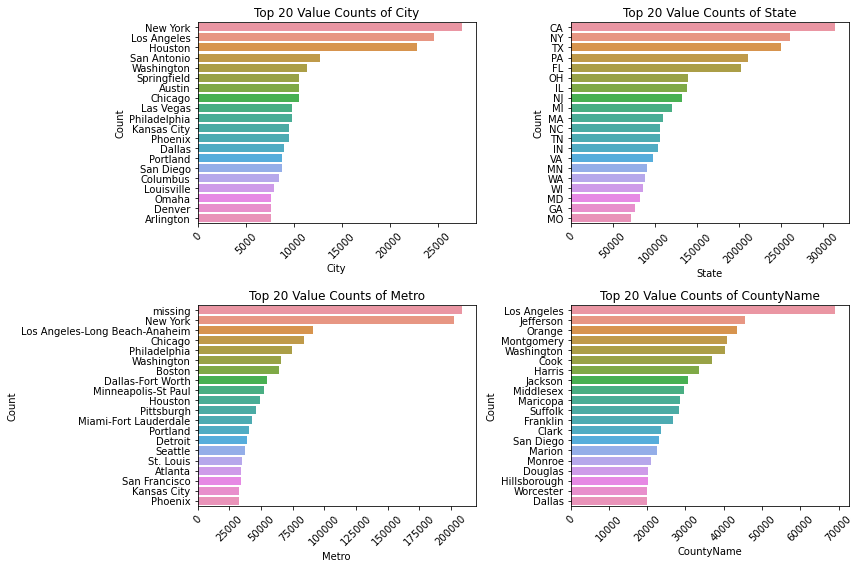

In [24]:
# Defined a list of column names to analyze and plot value counts for
columns_list = ["City", "State", "Metro", "CountyName"]

# Call the 'plot_value_counts' function to generate bar plots for the specified columns
# using the 'melted_df' DataFrame as the dataset
plot_value_counts(melted_df, columns_list)


The top 5 cities, states metro and counties with the highest number of houses are:

- cities: New York, Los Angeles, Houston, San Antonio and Washington
- states: CA, NY, TX,PA,FL
- metro: New York, Los Angeles, Chicago, Philadelphia, Washington
- counties: Los Angeles,Jefferson, Orange, Washington, Montgomery

#### Distribution of columns

In [25]:
# Defined a function to plot the distributions of  columns

def plot_column_distributions(data, columns):
    # Calculated the number of columns to plot
    num_columns = len(columns)
    
    # Created a grid of subplots with 2 columns each (histogram and kernel density plot)
    fig, axes = plt.subplots(num_columns, 2, figsize=(10*2, 6*num_columns))

    # Looped through the specified columns and create distribution plots
    for i, column in enumerate(columns):
        ax1 = axes[i, 0]  # Left subplot for the histogram
        ax2 = axes[i, 1]  # Right subplot for the kernel density plot

        # Plotted a histogram using seaborn
        sns.histplot(data[column], ax=ax1, bins=30, kde=False, edgecolor='black')
        ax1.set_title(f'{column} Distribution (Histogram)', fontsize=16)
        ax1.set_xlabel(column, fontsize=12)
        ax1.set_ylabel('Frequency', fontsize=12)

        # Plotted a kernel density plot using seaborn
        sns.kdeplot(data[column], ax=ax2, fill=True)
        ax2.set_title(f'{column} Distribution (Kernel Density Plot)', fontsize=16)
        ax2.set_xlabel(column, fontsize=12)
        ax2.set_ylabel('Density', fontsize=12)

    # Adjusted the spacing between subplots for better layout
    plt.tight_layout()
    
    # Displayed the plots
    plt.show()


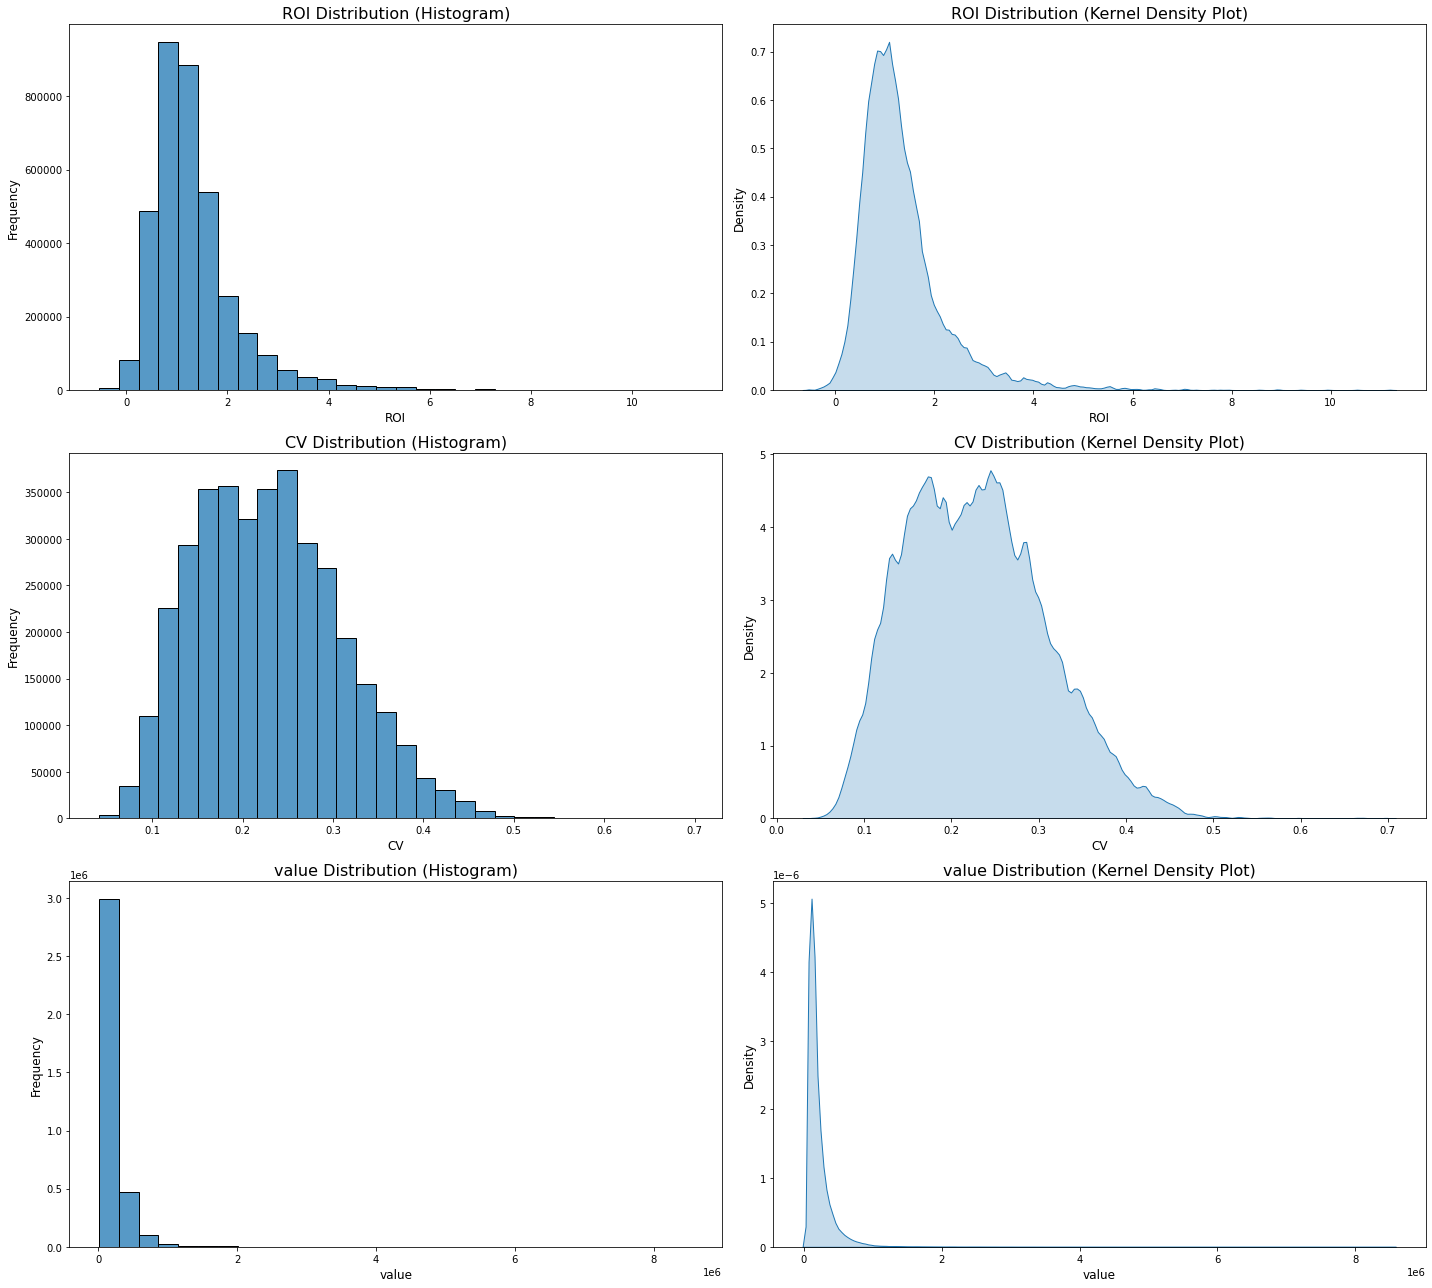

In [26]:
# Defined a list of continuous columns to analyze and plot their distributions
continuous_columns = ['ROI', 'CV', 'value']

# Called  the 'plot_column_distributions' function to create distribution plots
# for the specified continuous columns in the 'melted_df' DataFrame
plot_column_distributions(melted_df, continuous_columns)


- ROI: The distribution is positively skewed.Most of the houses have an ROI between 1% and 2% .It also has a long tail showing that there are outliers, houses with higher ROI impliying higher return.

- Value: The distribution of the house prices is positively skewed showing that most houses are lowly priced and it also has a long tail showing that there are outliers ie the extremely highly priced houses.

- CV: The plot shows that most of the houses have a cv between 0.1 and 0.3 which shows that their prices are close to the mean thus less risk but it also has a long tail showing that there are outliers, houses with higher cv impliying higher risk.

#### Checking for Outliers

IQR for RegionID column: 24320.25
Number of outliers in RegionID column: 26765
IQR for SizeRank column: 7260.5
Number of outliers in SizeRank column: 0
IQR for ROI column: 0.8341421408774268
Number of outliers in ROI column: 195040
IQR for CV column: 0.11609651734251925
Number of outliers in CV column: 14575
IQR for value column: 140900.0
Number of outliers in value column: 275048


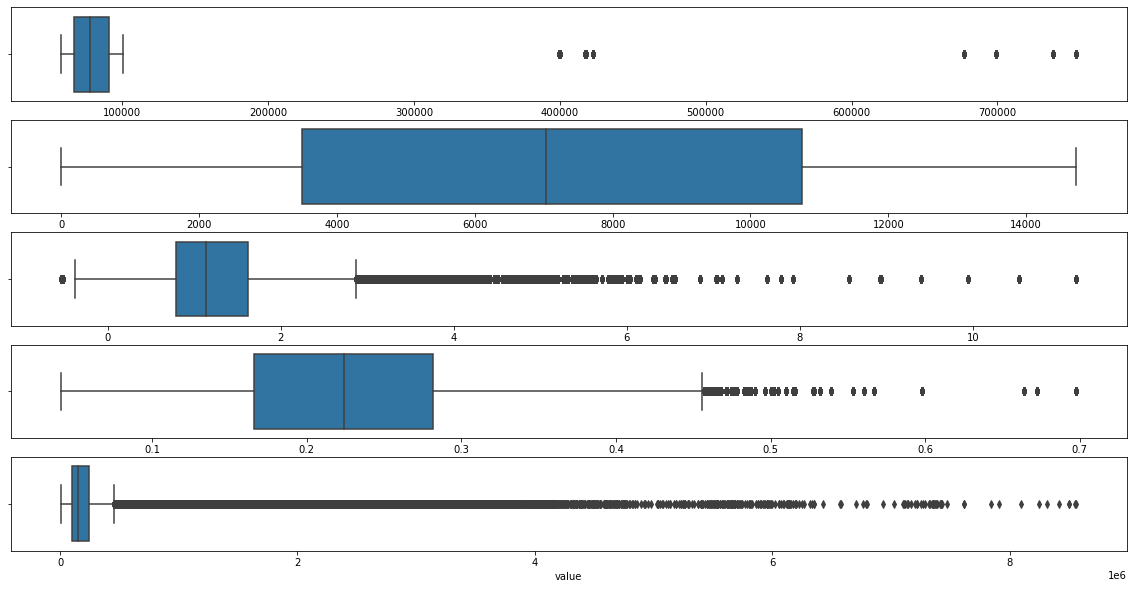

In [27]:
# Defined a function to check for outliers in specified numerical columns

def check_outliers(data, columns):
    # Created subplots for each column to visualize outliers
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(20, 10))
    
    # Looped through the specified columns
    for i, column in enumerate(columns):
        # Calculated the interquartile range (IQR) for the column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        
        # Print the IQR for the column
        print("IQR for {} column: {}".format(column, iqr))
        
        # Determined the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
        
        # Print the number of outliers for the column
        print("Number of outliers in {} column: {}".format(column, outliers.sum()))
        
        # Created a box plot to visualize the distribution of the column
        sns.boxplot(data=data, x=column, ax=axes[i])
    
    # Displayed the box plots
    plt.show()

# Selected numerical columns from the DataFrame 'melted_df'
num = melted_df.select_dtypes('number')
columns = num.columns

# Calling the 'check_outliers' function to check for outliers in the selected columns
check_outliers(melted_df, columns)


## Bivariate Analysis

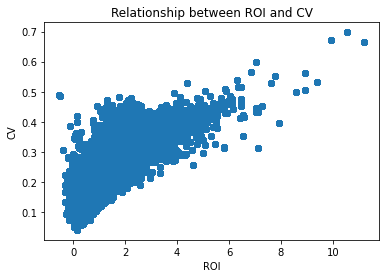

In [28]:
# Defined a function to create a scatter plot

def scatter_plot(x, y, x_label, y_label):
    # Created a scatter plot using the specified x and y data
    plt.scatter(x, y)
    
    # Set the x-axis label
    plt.xlabel(x_label)
    
    # Set the y-axis label
    plt.ylabel(y_label)
    
    # Set the plot title with dynamic labels
    plt.title(f'Relationship between {x_label} and {y_label}')
    
    # Display the plot
    plt.show()

# Calling the 'scatter_plot' function to create a scatter plot
scatter_plot(melted_df['ROI'], melted_df['CV'], 'ROI', 'CV')


- This plot shows the relationship between the return on investment and the coefficient of variation. It shows that the two have a strong positive relationship, that is, that increase in CV leads to increase in ROI and vice versa. This implies that the higher the risk, the higher the return.

- Since the two have such a strong relationship, findings using ROI will be similar to those using CV . Let's examine how the other variables are related to ROI.